# 위키피디아 주소에서 웹페이지 분석




In [1]:
from bs4 import BeautifulSoup

In [2]:
from urllib.request import urlopen
html= urlopen("https://ko.wikipedia.org/wiki")
html

In [3]:
soup = BeautifulSoup(html, "html.parser")


웹페이지 분석

1.   h1 추출 여기서 find_all() 명령어는 리스트를 반환함
2.  리스트 중 0번째 indexing 즉 첫번째 h1에 해당하는 텍스트를 추출한다


> 결론: 상위제목추출






In [4]:
soup.find_all("h1")

[<h1 class="firstHeading mw-first-heading" id="firstHeading"><span class="mw-page-title-namespace">위키백과</span><span class="mw-page-title-separator">:</span><span class="mw-page-title-main">대문</span></h1>]

In [5]:
soup.find_all("h1")[0].text

'위키백과:대문'



*웹페이지 구조이해*




  
1.   html문법은 head 밑에 body와 혹은 p (단락)으로 구성됨
2.   div는 단락안에서 특정내용을 묶어 한번더 그룹화 함.

ex) 서론 핵심 결말

이때 div문 뒤에는 attr을 쓰는데 여기는 속성으로
 개발자가 class이름을 지정한다


> 웹페이지 대략적인 구조


 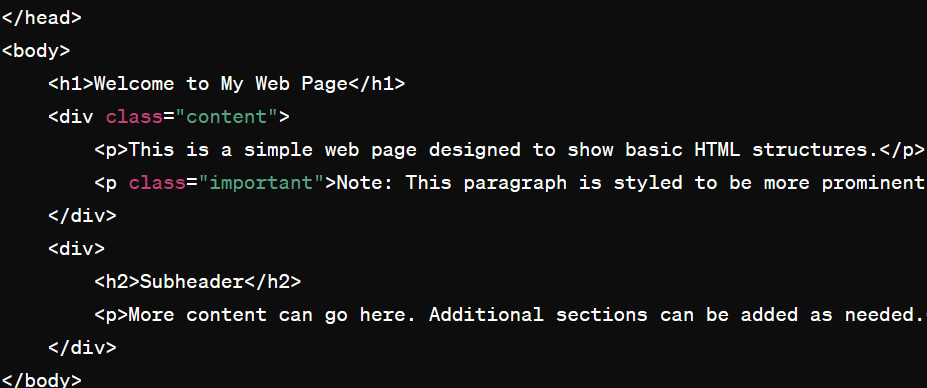



*   soup_find는 첫번째 div만 찾고 끝나 리스트가 아니다.
*   find_all은 모든 div를 찾아 각각의 div를 리스트로 받는다

*   따라서 밑에 두명령어는 같은 결과를 도출한다


In [6]:
soup.find_all("div",attrs="wikipedia-ko dyk main-box nomobile")[0].text

'\n알고 계십니까이게 뭔가요?\n\n\n투폴레프 Tu-95(그림)는 세계에서 운용되고 있는 전략폭격기 중 유일하게 프로펠러를 사용하고 있습니다. 이 폭격기의 엔진은 터보프롭이며, 1956년 이래 러시아 공군이 지속적으로 운용하고 있습니다.\n신라의 내물 마립간은 서기 400년 고구려의 광개토대왕의 도움으로 왜의 침입을 무찔렀습니다. 이후로 신라는 당분간 고구려와 수평적인 외교를 하지 못했습니다.\n미코얀 MiG-35는 본질적으로 미코얀 MiG-29K의 업그레이드 버전이지만, 개발사인 미코얀이 홍보를 위해 이름을 변경한 것으로 알려져 있습니다.\n대한민국 야구팀 NC 다이노스 소속 이용찬 투수는 2024년 3월 23일 두산 베어스와의 경기에서 KBO 리그 최초로 0구 승리 투수가 되었습니다.\n세계 최초의 제트 전투기인 메서슈미트 Me 262는 나치 독일의 패망 이후 여러 국가에서 제트 전투기의 모델이 되었습니다. 대표적인 예로 6.25 전쟁 당시 최초의 제트전을 벌였던 미국의 노스아메리칸 F-86 세이버와 소련의 미코얀-구레비치 MiG-15은 메서슈미트 Me 262의 디자인에 영향을 받아 외관이 흡사합니다.\n\n'

In [9]:
soup.find("div", attrs="wikipedia-ko dyk main-box nomobile").text

'\n알고 계십니까이게 뭔가요?\n\n\n투폴레프 Tu-95(그림)는 세계에서 운용되고 있는 전략폭격기 중 유일하게 프로펠러를 사용하고 있습니다. 이 폭격기의 엔진은 터보프롭이며, 1956년 이래 러시아 공군이 지속적으로 운용하고 있습니다.\n신라의 내물 마립간은 서기 400년 고구려의 광개토대왕의 도움으로 왜의 침입을 무찔렀습니다. 이후로 신라는 당분간 고구려와 수평적인 외교를 하지 못했습니다.\n미코얀 MiG-35는 본질적으로 미코얀 MiG-29K의 업그레이드 버전이지만, 개발사인 미코얀이 홍보를 위해 이름을 변경한 것으로 알려져 있습니다.\n대한민국 야구팀 NC 다이노스 소속 이용찬 투수는 2024년 3월 23일 두산 베어스와의 경기에서 KBO 리그 최초로 0구 승리 투수가 되었습니다.\n세계 최초의 제트 전투기인 메서슈미트 Me 262는 나치 독일의 패망 이후 여러 국가에서 제트 전투기의 모델이 되었습니다. 대표적인 예로 6.25 전쟁 당시 최초의 제트전을 벌였던 미국의 노스아메리칸 F-86 세이버와 소련의 미코얀-구레비치 MiG-15은 메서슈미트 Me 262의 디자인에 영향을 받아 외관이 흡사합니다.\n\n'



> ul은 목록을 의 li는 목록안에 하나의 상품들을 의미한다.



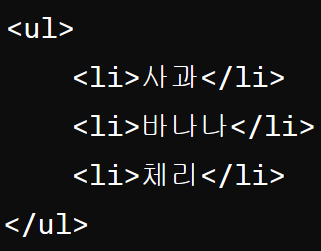

* div는 문서의 영역 분할을 위한 영역이고 soup.find명령어로 class가 다음과 같은 단락 하나 가져옴 *거기서 뭘찾을까*  
### * li를 찾는다 위에 그림에서 보듯 li는 상품의 리스트 즉 div 안에 각줄이 li로 구성되어있음을 알 수 있다

 이때 바로 .text를 쓰면 오류가 발생한다. 명령어가 *find_all이기 때문이다*.

 따라서 [0]과 같이 indexing하여 li하나를 지정해주고 text를 추출한결과로

> 주어진 attr div단락에서 첫번째 한줄이 li로 구성되있음 을 알 수 있다.





In [7]:
soup.find("div", attrs="wikipedia-ko dyk main-box nomobile").find_all("li")[0].text

'투폴레프 Tu-95(그림)는 세계에서 운용되고 있는 전략폭격기 중 유일하게 프로펠러를 사용하고 있습니다. 이 폭격기의 엔진은 터보프롭이며, 1956년 이래 러시아 공군이 지속적으로 운용하고 있습니다.'

단락안에 모든 li 안에 text만 반복추출
>  결론: 해당 단락의 모든 text추출

## 이거 왜할까?
단락안에 조금더 핵심적인 내용만 추출 할 수 있다.

여기서는
"알고 계십니까" 와 같은 문장은 추출하지 않음

In [8]:
dykli = soup.find("div", attrs="wikipedia-ko dyk main-box nomobile").find_all("li")
dyk = []
for i in dykli:
  dyk.append(i.get_text())
dyk

['투폴레프 Tu-95(그림)는 세계에서 운용되고 있는 전략폭격기 중 유일하게 프로펠러를 사용하고 있습니다. 이 폭격기의 엔진은 터보프롭이며, 1956년 이래 러시아 공군이 지속적으로 운용하고 있습니다.',
 '신라의 내물 마립간은 서기 400년 고구려의 광개토대왕의 도움으로 왜의 침입을 무찔렀습니다. 이후로 신라는 당분간 고구려와 수평적인 외교를 하지 못했습니다.',
 '미코얀 MiG-35는 본질적으로 미코얀 MiG-29K의 업그레이드 버전이지만, 개발사인 미코얀이 홍보를 위해 이름을 변경한 것으로 알려져 있습니다.',
 '대한민국 야구팀 NC 다이노스 소속 이용찬 투수는 2024년 3월 23일 두산 베어스와의 경기에서 KBO 리그 최초로 0구 승리 투수가 되었습니다.',
 '세계 최초의 제트 전투기인 메서슈미트 Me 262는 나치 독일의 패망 이후 여러 국가에서 제트 전투기의 모델이 되었습니다. 대표적인 예로 6.25 전쟁 당시 최초의 제트전을 벌였던 미국의 노스아메리칸 F-86 세이버와 소련의 미코얀-구레비치 MiG-15은 메서슈미트 Me 262의 디자인에 영향을 받아 외관이 흡사합니다.']

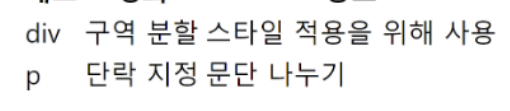

## 다시한번 html 문법 복습

p는 실제 단락구분을 위한것이고 div는 논리적 단락 구분을 위한것이다.

# 위키피디아 웹페이지의 대한민국의 영화 흥행기록에 대한 웹페이지 분석

In [9]:
import re

In [ ]:
html = urlopen("https://ko.wikipedia.org/wiki/%EB%8C%80%ED%95%9C%EB%AF%BC%EA%B5%AD%EC%9D%98_%EC%98%81%ED%99%94_%ED%9D%A5%ED%96%89_%EA%B8%B0%EB%A1%9D")
soup = BeautifulSoup(html, "html.parser")
soup

*웹페이지 제목 사용을 분석 *

가장 큰제목 h1을 초반부에 한번 사용하고
그 밑으로 소제목을 사용한 구조

In [12]:
hs = soup.find_all(re.compile("h[1-6]"))
[h.name for h in hs]

['h2', 'h1', 'h2', 'h2', 'h2', 'h2', 'h2', 'h2']

각각 text를 추출하면 h2인 '목차'는 중요하지 않고

h1인 '대한민국의 영화 흥행 기록' 을 큰 제목으로 전개하고 있음을 알 수 있다.

In [13]:
[h.text for h in hs]

['목차',
 '대한민국의 영화 흥행 기록',
 '흥행 순위 목록[편집]',
 '시대별 주요 흥행 기록[편집]',
 '흥행 매출 순위[편집]',
 '같이 보기[편집]',
 '각주[편집]',
 '외부 링크[편집]']

해당 웹페이지에서 class가 "wikitable"인 table은 3개임을 알 수 있다.

In [11]:
tbl = soup.find_all("table", {"class":"wikitable"})

In [15]:
len(tbl)

3

첫번째 테이블의 첫번째 행결과를 출력하는 명령어

In [12]:
tbl[0].tbody.tr

<tr>
<th>순위
</th>
<th>제목
</th>
<th>감독
</th>
<th>한국내 배급사
</th>
<th>개봉일
</th>
<th>관객수
</th>
<th class="unsortable">기타
</th></tr>

*  테이블의 n번째 행을 출력하고 싶다면
*  해당테이들의 모든 tr을 찾아서 인덱싱해줘야한다.
*  즉 "모든" tr을 지정해주는 명령어가 있어야 행의 인덱싱이 가능해진다.

In [13]:
tbl[0].tbody.find_all('tr')[1].text

'\n1\n\n《명량》\n\n김한민\n\nCJ E&M\n\n2014-07-30\n\n17,616,141\n\n영화진흥위원회 발권통계 기준\n'

th는 첫번째 행인 변수이름과 같은 메타데이터를 출력 하는 명령어

In [14]:
tbl[0].find_all("th")

[<th>순위
 </th>,
 <th>제목
 </th>,
 <th>감독
 </th>,
 <th>한국내 배급사
 </th>,
 <th>개봉일
 </th>,
 <th>관객수
 </th>,
 <th class="unsortable">기타
 </th>]

In [16]:
ths = [h.get_text(strip=True)for h in tbl[0].find_all("th")]

첫번째 행의 변수이름들을 추출한다 이때

 strip인자는 앞뒤 공백여부만 결정

 가령" 순위 "
vs "순위"

In [17]:
ths

['순위', '제목', '감독', '한국내 배급사', '개봉일', '관객수', '기타']

In [18]:
dlist = []
for r in tbl[0].find_all("tr"):
    tmp = [d.get_text(strip=True) for d in r.find_all("td")]
    tmp = [re.sub("[《》]", "", d) for d in tmp]
    tdic = dict(zip(ths, tmp))
    dlist.append(tdic)


*  모든 행을 찾아 변수 r지정
*  모든행에 모든 td 즉 cell을 찾아 변수 d 지정

*  d에대해 text추출 각각실행

*  따라서 tmp는 모든 cell에 text값
*  이것에 대해 문자기호 를 공백으로 대체 수행
*  zip은 메타데이터와 나머지 cell들이 맞으면 결합해줌
*  이걸 키와 레이블로 구성된 딕셔너리 형식을 만들어주는 함수에 대입

여기서 딕셔너리도 키값을 받아야되는데

In [ ]:
dlist

# 만든 딕셔너리로 데이터프레임 형성!

In [21]:
import pandas as pd

In [20]:
dlist=dlist[1:]

In [22]:
df = pd.DataFrame.from_dict(dlist)
df

,순위,제목,감독,한국내 배급사,개봉일,관객수,기타
0,1,명량,김한민,CJ E&M,2014-07-30,"17,616,141",영화진흥위원회 발권통계 기준
1,2,극한직업,이병헌,CJ엔터테인먼트,2019-01-23,"16,266,480",영화진흥위원회 발권통계 기준
2,3,신과함께: 죄와 벌,김용화,롯데엔터테인먼트,2017-12-20,"14,414,658",영화진흥위원회 발권통계 기준
3,4,국제시장,윤제균,CJ E&M,2014-12-17,"14,265,222",영화진흥위원회 발권통계 기준
4,5,어벤져스: 엔드게임,루소 형제,월트디즈니컴퍼니코리아,2019-04-24,"13,977,602",영화진흥위원회 발권통계 기준
...,...,...,...,...,...,...,...
62,63,베를린,류승완,CJ E&M,2013-01-30,"7,166,688",영화진흥위원회 발권통계 기준
63,64,마스터,조의석,CJ E&M,2016-12-21,"7,150,586",영화진흥위원회 발권통계 기준
64,65,터널,김성훈,쇼박스,2016-08-10,"7,120,780",영화진흥위원회 발권통계 기준
65,66,어벤져스,조스 휘던,월트디즈니컴퍼니코리아,2012-04-26,"7,087,971",영화진흥위원회 발권통계 기준


# 여러 주소를 파싱하며 각 영화에대한 설명문을 추출

여기서 a로 감싸져있는 tag는 외부링크 가 첨부되어있으며
이때 정확히 그 외부코드는 href=""로 a tag에 감싸져있음

In [ ]:
links = soup.find("table", attrs="wikitable")("a")
links

df내에 '제목' 열에서의 모든 행의 값을 리스트로 반환하려면 panda패키지에 to_list()를 쓰면된다.

In [24]:
df.제목.to_list()

['명량',
 '극한직업',
 '신과함께: 죄와 벌',
 '국제시장',
 '어벤져스: 엔드게임',
 '겨울왕국 2',
 '아바타',
 '베테랑',
 '서울의 봄',
 '괴물',
 '도둑들',
 '7번방의 선물',
 '알라딘',
 '암살',
 '범죄도시2',
 '광해, 왕이 된 남자',
 '왕의 남자',
 '신과함께: 인과 연',
 '택시운전사',
 '태극기 휘날리며',
 '부산행',
 '해운대',
 '변호인',
 '어벤져스: 인피니티 워',
 '실미도',
 '아바타: 물의 길',
 '범죄도시3',
 '어벤져스: 에이지 오브 울트론',
 '인터스텔라',
 '겨울왕국',
 '기생충',
 '보헤미안 랩소디',
 '검사외전',
 '엑시트',
 '설국열차',
 '내부자들',
 '관상',
 '아이언맨 3',
 '국가대표',
 '캡틴 아메리카: 시빌 워',
 '해적: 바다로 간 산적',
 '수상한 그녀',
 '디워',
 '과속스캔들',
 '탑건: 매버릭',
 '스파이더맨: 파 프롬 홈',
 '웰컴 투 동막골',
 '공조',
 '트랜스포머 3',
 '히말라야',
 '미션 임파서블: 고스트 프로토콜',
 '스파이더맨: 노 웨이 홈',
 '트랜스포머: 패자의 역습',
 '밀정',
 '최종병기 활',
 '써니',
 '트랜스포머',
 '화려한 휴가',
 '한산: 용의 출현',
 '스파이더맨: 홈커밍',
 '엘리멘탈',
 '1987',
 '베를린',
 '마스터',
 '터널',
 '어벤져스',
 '인천상륙작전']

In [25]:
llist = [l["href"] for l in links if l.text in df.제목.to_list()]

*  links안에는 a tag즉 주소가 들어가있다
*  이때 테이블에 영화 이름과 같은 텍스트를 가지고있다면 하이퍼링크를 추출하라는 뜻이다.

>  다시 정리해보면 links는 하이퍼링크와 영화이름을 같이 가지고있는 적당한 a tag이다. 이때 여기서 a tag안 텍스트가 테이블의 영화이름과 일치한다면 이 a tag에 내에서 하이퍼링크 뽑아서 리스트로 저장한다.

영화이름에 걸려있는 외부링크만 추출하게됨

In [26]:
llist[0]

'/wiki/%EB%AA%85%EB%9F%89_(%EC%98%81%ED%99%94)'

In [27]:
thtml= urlopen("https://ko.wikipedia.org"+llist[0])
tsoup = BeautifulSoup(thtml, "html.parser")

첫번째 하이퍼링크로 url설정후 새롭게 파싱한다. 여기서는 영화 명량의 웹페이에서 새롭게 scarp을 할 수 있게된다.

해당 웹페이지에서 class가 "infobox"인 첫번째 table에 모든행을 추출

In [28]:
ttbl = tsoup.find("table", {"class":"infobox"}).find_all("tr")



*  현재 ttbl은 테이블의 모든 행을 리스트로 가지고있다
*  즉 인덱스 3은 테이블의 4번째 행을 출력하라는 뜻이다
*  이때 th는 헤더의 변수를 출력하라는 뜻이다.
*  즉 이 테이블은 현재 각 행마다 메타 데이터를 가지고있다.
>  실행결과 4번째 행의 메타데이터는 '각본'
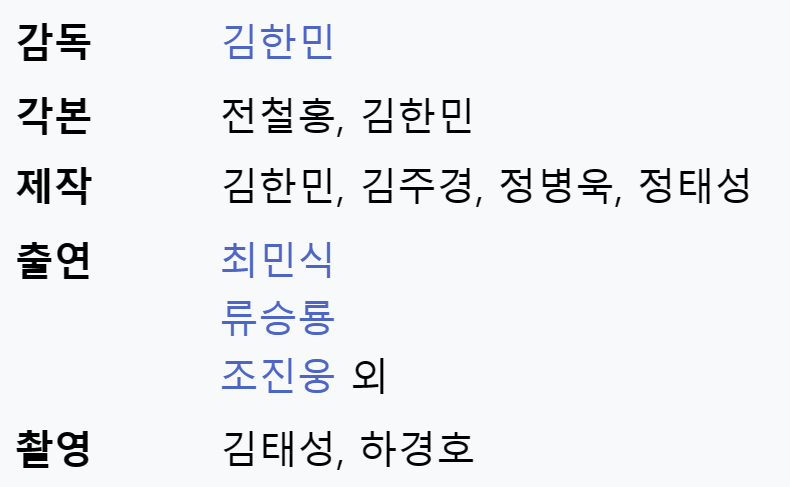

In [29]:
ttbl[3].th

<th class="infobox-label" scope="row" style="white-space:nowrap;padding-right:0.65em;">각본</th>

In [30]:
tdic = {r.th.text:r.td.text for r in ttbl[2:]}

각행의 메타데이터와 행값으로 딕셔너리형성

In [31]:
tdic

{'감독': '김한민',
 '각본': '전철홍, 김한민',
 '제작': '김한민, 김주경, 정병욱, 정태성',
 '출연': '최민식류승룡조진웅 외',
 '촬영': '김태성, 하경호',
 '편집': '김창주',
 '음악': '김태성',
 '제작사': '빅스톤픽쳐스',
 '배급사': '씨제이이앤앰 주식회사(CJ엔터테인먼트 명의)',
 '개봉일': '\n2014년 7월 30일\xa0(2014-07-30)\n',
 '시간': '128분',
 '국가': '대한민국',
 '언어': '한국어, 일본어',
 '제작비': '190억원'}

In [ ]:
time = []
budget = []

for l in llist:
    thtml = urlopen("https://ko.wikipedia.org" + l)
    tsoup = BeautifulSoup(thtml, "html.parser")
    ttbl = tsoup.find("table", {"class": "infobox"}).find_all("tr")
    tdic = {r.th.text: r.td.text for r in ttbl[2:]}
    time.append(tdic.get("시간"))
    budget.append(tdic.get("제작비"))

print(time)
print(budget)


['128분', '111분', '140분', '126분', '181분', '103분[4]', '161분170분 (확장판)', '123분', '141분', '119분', '139분', '127분', '128분[1]', '140분', '106분', '131분', '119분', '141분', '137분', '145분', '118분', '120분', '127분(2시간 7분)', '149분', '135분', '192분', '105분', '141분', '169분', '102분[1]', '132분[3][4]', '134분', '126분', '103분', '125분', '130분(원본판)180분(디 오리지널)', '142분', '130분', '134분', '147분[1][2]', None, '124분', '92분', '108분', '131분', '129분', None, '125분', '155분', '124분', '133분[1]', '148분', '144분', '140분', '112분 (일반판)128분 (감독판)', '124분 (일반판)  135분 (감독판)', '143분', '125분(15세)118분(12세)', '일반판\xa0: 129분 감독판\xa0: 150분', '133분[1]', '102분', '129분', '120분', '143분', '126분', '125분', '110분  141분 (확장판)']
['190억원', None, '350억 (속편 제작비 일부 포함)', None, '10억 5600만 달러', '2억 달러', '4억달러(USD)', None, None, '110억원', '140억[1]', None, '1억 8300만 달러', None, '130억원', None, None, None, None, None, '115억 원(약 1055만 달러)', None, None, '3억 2,500만 달러', None, '2억 5,000만 달러[1]', None, '$267,000,000', '1억 6500만 달러', '$1억 5,000만[2][3]', '135억 원[5]

*  list에서 하이퍼 링크가져와서 각 페이지에 반복적으로 패싱함
*  그 페이지는 영화 상세페이지로 infobox 테이블의 영화 내용에 대한 설명이다.
*  모든행의 th.text(메타데이터)를 딕셔너리의 키 값으로 한다.
*  테이블의 모든 td 즉 cell값을 딕셔너리로 저장
*  딕셔너리에 키 값이 "시간" 일때 즉 모든영화의 상영시간을 리스트로 저장
*  딕셔너리에 키 값이 "제작비" 일때 즉 모든영화의 제작비를 리스트에 저장

>  *시간과 제작비에 대해 테이블 형성 *

In [ ]:
tb = pd.DataFrame({"시간":time, "제작비":budget})
tb

,시간,제작비
0,128분,190억원
1,111분,None
2,140분,350억 (속편 제작비 일부 포함)
3,126분,None
4,181분,10억 5600만 달러
...,...,...
62,120분,None
63,143분,None
64,126분,None
65,125분,2억 2000만달러


# 테이블에 영화상세 설명항목 추가시키기

>  a.find_next_sibling(p)

이 명령어를 해석하면


a 다음이 p일때만 명령어를 실행한다

이미지를 보면 table 밑에 p 즉 단락이 존재한다

table.find_next_sibling(p)는

table 다음이 p 태그 즉 단락이면 그 단락을 가져온다.

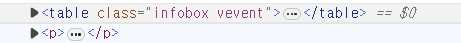

In [ ]:
thtml = urlopen("https://ko.wikipedia.org" + llist[0])
tsoup = BeautifulSoup(thtml, "html.parser")
ttbl = tsoup.find("table", {"class":"infobox"})
tp = ttbl.find_next_sibling("p")
text = tp.get_text(strip="True")
text

'《명량》(鳴梁)은 2014년 7월 30일에 개봉된대한민국의 영화이다. 기획 단계에서, "명량 - 회오리바다"라는 제목으로 홍보가 이루어졌으나, 개봉 전 단계에서 제목이 수정되어 현재의 제목으로 개봉하였다. 개봉 12일만에천만 관객을 돌파하여 한국 영화 사상 최단기간에 1천만 관객을 압도적으로 기록한 바 있다.[1]'

웹페이지 새로 패싱후 해당 테이블에대해
다음오는 단락을 공백 없애고 텍스트만 추출

그러면
 웹페이지 구조상 그 영화의 첫번째 설명 단락이 추출된다.

In [ ]:
tp = ttbl.find_next_sibling("p")
tps = tp.get_text(strip=True)
while tp.find_next_sibling("p"):
    tp = tp.find_next_sibling("p")
    tps += tp.get_text(strip=True)
print(tps)


《명량》(鳴梁)은 2014년 7월 30일에 개봉된대한민국의 영화이다. 기획 단계에서, "명량 - 회오리바다"라는 제목으로 홍보가 이루어졌으나, 개봉 전 단계에서 제목이 수정되어 현재의 제목으로 개봉하였다. 개봉 12일만에천만 관객을 돌파하여 한국 영화 사상 최단기간에 1천만 관객을 압도적으로 기록한 바 있다.[1]개봉 18일차인 2014년 8월 16일에 관객 1,398만 명 이상을 동원하며 최고 관객 수를 보유한 "아바타"의 1,333만 명을 뛰어넘으며 역대 흥행 1위를 달성하였고, 최종 1,761만 명을 돌파하는 기염을 토한 역대 최대 기록이다.정유재란초반에 일어난명량 해전을 소재로 한 본 작품의 특징으로서, 역사적 고증을 현실성 있게 다룬 소재와 전쟁 액션 영화 특유의 오락성을 가미한 점이 가장 큰 성공 요인으로 분석된다.


테이블 다음 단락이 3개 있다.

 즉 3번째 단락 p까지만 text 추출된다.

In [ ]:
txtp = []
for l in llist:
    thtml = urlopen("https://ko.wikipedia.org" + l)
    tsoup = BeautifulSoup(thtml, "html.parser")
    ttbl = tsoup.find("table", {"class": "infobox"})
    tp = ttbl.find_next_sibling("p")
    tps = tp.get_text(strip=True)
    while tp.find_next_sibling("p"):
        tp = tp.find_next_sibling("p")
        tps += tp.get_text(strip=True)
    txtp.append(tps)
print(txtp)


['《명량》(鳴梁)은 2014년 7월 30일에 개봉된대한민국의 영화이다. 기획 단계에서, "명량 - 회오리바다"라는 제목으로 홍보가 이루어졌으나, 개봉 전 단계에서 제목이 수정되어 현재의 제목으로 개봉하였다. 개봉 12일만에천만 관객을 돌파하여 한국 영화 사상 최단기간에 1천만 관객을 압도적으로 기록한 바 있다.[1]개봉 18일차인 2014년 8월 16일에 관객 1,398만 명 이상을 동원하며 최고 관객 수를 보유한 "아바타"의 1,333만 명을 뛰어넘으며 역대 흥행 1위를 달성하였고, 최종 1,761만 명을 돌파하는 기염을 토한 역대 최대 기록이다.정유재란초반에 일어난명량 해전을 소재로 한 본 작품의 특징으로서, 역사적 고증을 현실성 있게 다룬 소재와 전쟁 액션 영화 특유의 오락성을 가미한 점이 가장 큰 성공 요인으로 분석된다.', '《극한직업》은 2019년 상반기에 개봉한대한민국의 영화이다.[1]대한민국에서는 개봉 15일만인 2019년 2월 6일, 관객 수가 1,000만 명을 넘어섰다.[A]총 누적 관객수는 16,266,337명으로 역대 관객수 순위 2위, 역대 매출액 순위 1위를 기록했다. 극한직업의 순제작비는 65억 원, 총제작비는 약 95억 원이다. 총 매출은 1396억으로, 제작비의 14배가 넘는다.[3]', '《신과함께-죄와 벌》은2017년12월 20일에 개봉한 대한민국의 영화로,주호민의동명 만화를 원작으로 한다. 국내 영화 중 유일무이하게 전체 장면의 상당수가 컴퓨터그래픽(CG)으로 화상 처리된판타지영화로 기획 및 제작하여,[1]2018년9월 26일에SBS및KNN 부산경남방송등 9개 지역 민방 네트워크를 통해서 추석 특선 영화로도 방영되어,[2]13.6%를 웃도는 압도적인 시청률을 기록하였다.', '《국제시장》은2014년12월에 개봉한대한민국의 영화이다.윤제균감독의 작품이며,황정민,김윤진,오달수,정진영,장영남,라미란,김슬기가 출연한다. 한국전쟁 세대의 삶을 다뤘다.개봉 12일째 400만을 돌파하고, 개봉 17일 만에 600만을 돌파 하더니만, 개

*  테이블 밑줄 단락을 공백없이 text추출한다
*  이때 각각의 웹페이지에 대해 반복 실행 반복문 옆에 조건을 해석하면 ,

*  tp가 우선 첫번째 단락이었고 그 다음 요소도 p라면 ,즉 단락이라면 반복문 실행한다.
*  이때 tp를 그 다음 단락으로 지정하고 여백없이 text추출해서 tps에 추가

*  그리고 반복문을 순회한다. 즉 그 다음 요소가 p가 아니라면 반복문이 종료되고 영화 설명이 끝난다.



In [ ]:
 tdf = pd.concat([df,pd.DataFrame({"개요":txtp})],axis=1)

테이블에 "개요" 라는 열로 영화 설명문 데이터를 추가한다.

In [ ]:
tdf

,순위,제목,감독,한국내 배급사,개봉일,관객수,기타,개요
0,1,명량,김한민,CJ E&M,2014-07-30,"17,616,141",영화진흥위원회 발권통계 기준,《명량》(鳴梁)은 2014년 7월 30일에 개봉된대한민국의 영화이다. 기획 단계에서...
1,2,극한직업,이병헌,CJ엔터테인먼트,2019-01-23,"16,266,480",영화진흥위원회 발권통계 기준,《극한직업》은 2019년 상반기에 개봉한대한민국의 영화이다.[1]대한민국에서는 개봉...
2,3,신과함께: 죄와 벌,김용화,롯데엔터테인먼트,2017-12-20,"14,414,658",영화진흥위원회 발권통계 기준,"《신과함께-죄와 벌》은2017년12월 20일에 개봉한 대한민국의 영화로,주호민의동명..."
3,4,국제시장,윤제균,CJ E&M,2014-12-17,"14,265,222",영화진흥위원회 발권통계 기준,"《국제시장》은2014년12월에 개봉한대한민국의 영화이다.윤제균감독의 작품이며,황정민..."
4,5,어벤져스: 엔드게임,루소 형제,월트디즈니컴퍼니코리아,2019-04-24,"13,977,602",영화진흥위원회 발권통계 기준,《어벤져스: 엔드게임》(영어:Avengers: Endgame)은2019년개봉한미국의...
...,...,...,...,...,...,...,...,...
62,63,베를린,류승완,CJ E&M,2013-01-30,"7,166,688",영화진흥위원회 발권통계 기준,"""베를린(The Berlin File)""은2013년에 개봉한대한민국의 영화이다.거대..."
63,64,마스터,조의석,CJ E&M,2016-12-21,"7,150,586",영화진흥위원회 발권통계 기준,"《마스터》는2016년에 개봉한대한민국의 영화이다.[1]조의석감독은 ""이병헌이 연기한..."
64,65,터널,김성훈,쇼박스,2016-08-10,"7,120,780",영화진흥위원회 발권통계 기준,"《터널》은2016년에 개봉한대한민국의재난 영화이다.김성훈감독의 연출작으로하정우,배두..."
65,66,어벤져스,조스 휘던,월트디즈니컴퍼니코리아,2012-04-26,"7,087,971",영화진흥위원회 발권통계 기준,《어벤져스》(영어:The Avengers)는마블 스튜디오가 제작하고월트 디즈니 픽처...
